In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import variation, norm
import statsmodels as sm
from matplotlib import pyplot as plt

%matplotlib inline

## Exercício 1

In [2]:
atividade_empresas = pd.read_csv("./DataSets/aumento_atividade_empresas.csv", sep=";")
atividade_empresas.head()

,Empresa,Meses,Setor,Tamanho
0,1,8,C,G
1,2,9,C,M
2,3,4,I,G
3,4,5,I,M
4,5,3,I,M


In [3]:
atividade_empresas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Empresa,15.0,8.0,4.472136,1.0,4.5,8.0,11.5,15.0
Meses,15.0,5.8,1.780851,3.0,4.5,6.0,7.0,9.0


In [4]:
atividade_empresas.describe(include = 'object').transpose()

,count,unique,top,freq
Setor,15,2,I,8
Tamanho,15,3,M,7


<hr>

In [5]:
calculated_setor = atividade_empresas.groupby(by='Setor').agg({'Meses': [np.mean, np.median, np.std, variation]}).reset_index()
calculated_setor[('Meses', 'variation')] = calculated_setor[('Meses', 'variation')] * 100
calculated_setor

Setor     Meses                           
             mean median      std  variation
0     C  7.142857    8.0  1.46385  18.973666
1     I  4.625000    4.5  1.06066  21.452038

#### Baseados nos valores obtidos concluimos que em media do número de meses com crescimento do setor comercial é maior do que o setor industrial. 

#### Para responder a pergunta sobre qual dos grupos é mais homogênio, é necessário calcular o coeficiente de variação, dado pela divisão entre o desvio-padrão sobre a média. O coeficiente de variação fornece a variação dos dados obtidos em relação à média. Quanto menor for o seu valor, mais homogêneos serão os dados. O coeficiente de variação é considerado baixo (apontando um conjunto de dados bem homogêneos) quando for menor ou igual a 25%.
<a href="https://brasilescola.uol.com.br/matematica/coeficiente-variacao.htm">Referência</a>

#### Concluimos que as empresas do setor comercial são mais homogêneas do que as empresas do setor industrial.

<hr>

In [6]:
calculated_tamanho = atividade_empresas.groupby(by='Tamanho').agg({'Meses': [np.mean, np.median, np.std, variation]}).reset_index()
calculated_tamanho[('Meses', 'variation')] = calculated_tamanho[('Meses', 'variation')] * 100
calculated_tamanho

Tamanho     Meses                            
               mean median       std  variation
0       G  6.000000    6.0  2.309401  33.333333
1       M  5.857143    6.0  2.115701  33.442218
2       P  5.500000    5.5  0.577350   9.090909

#### O numero médio de meses com crescimento parece aumentar muito pouco conforme o tamanho da empresa aumenta.

#### A mediana do numero de meses com crescimento entre as grandes e médias empresas são iguais e levemente superiores as pequenas empresas.

#### Diante da medida de coeficiente de variação e desvio padrão podemos dizer que as pequenas empresas representam um grupo mais homogeneo do que as médias e grandes empresas.

#### Baseados nas observações não concluiriamos que existe relação entre o tamanho da empresa e o numero de meses com crescimento, uma vez que a diferença do número médio de meses com crescimento em cada grupo não parece ser significativa. E é válido salientar que a media não parece ter a mesma representatividade em cada grupo.

<hr>

## Exercício 2

In [7]:
pesos_mulheres_por_idade = pd.read_csv("./DataSets/pesos_mulheres_por_idade.csv", sep=";")
pesos_mulheres_por_idade.head()

,40,45,50,55,60,65
0,55,58,60,77,70,65
1,50,56,74,78,76,82
2,68,62,70,70,74,72
3,65,65,78,72,83,82
4,62,63,76,80,85,80


In [8]:
media_40    = pesos_mulheres_por_idade['40'].mean()
mediana_40  = pesos_mulheres_por_idade['40'].median()
sd_40       = pesos_mulheres_por_idade['40'].std()
var_40      = pesos_mulheres_por_idade['40'].var()
cv_40       = (sd_40/media_40)*100

media_45    = pesos_mulheres_por_idade['45'].mean()
mediana_45  = pesos_mulheres_por_idade['45'].median()
sd_45       = pesos_mulheres_por_idade['45'].std()
var_45      = pesos_mulheres_por_idade['45'].var()
cv_45       = (sd_45/media_45)*100

media_50    = pesos_mulheres_por_idade['50'].mean()
mediana_50  = pesos_mulheres_por_idade['50'].median()
sd_50       = pesos_mulheres_por_idade['50'].std()
var_50      = pesos_mulheres_por_idade['50'].var()
cv_50       = (sd_50/media_50)*100

media_55    = pesos_mulheres_por_idade['55'].mean()
mediana_55  = pesos_mulheres_por_idade['55'].median()
sd_55       = pesos_mulheres_por_idade['55'].std()
var_55      = pesos_mulheres_por_idade['55'].var()
cv_55       = (sd_55/media_55)*100

media_60    = pesos_mulheres_por_idade['60'].mean()
mediana_60  = pesos_mulheres_por_idade['60'].median()
sd_60       = pesos_mulheres_por_idade['60'].std()
var_60      = pesos_mulheres_por_idade['60'].var()
cv_60       = (sd_60/media_60)*100

media_65    = pesos_mulheres_por_idade['65'].mean()
mediana_65  = pesos_mulheres_por_idade['65'].median()
sd_65       = pesos_mulheres_por_idade['65'].std()
var_65      = pesos_mulheres_por_idade['65'].var()
cv_65       = (sd_65/media_65)*100

In [44]:
l_media = [media_40, media_45, media_50, media_55, media_60, media_65]
l_mediana = [mediana_40, mediana_45, mediana_50, mediana_55, mediana_60, mediana_65]
l_std = [sd_40, sd_45, sd_50, sd_55, sd_60, sd_65]
l_cv = [cv_40, cv_45, cv_50, cv_55, cv_60, cv_65]
df_mulheres = pd.DataFrame(
    {'idade': ['40', '45', '50', '55', '60', '65'],
     'mean': l_media,
     'median': l_mediana,
     'standard_deviation': l_std,
     'variation_coefficient':l_cv
    })
df_mulheres

,idade,mean,median,standard_deviation,variation_coefficient
0,40,60.0,62.0,7.382412,12.304019
1,45,60.8,62.0,3.701351,6.087749
2,50,71.6,74.0,7.127412,9.954486
3,55,75.4,77.0,4.219005,5.595497
4,60,77.6,76.0,6.268971,8.078571
5,65,76.2,80.0,7.496666,9.838144


<h4>
    <ul>
        <li>Com o aumento da idade de 40 para 45 anos nao notamos alterações significativas no peso medio das mulheres. Entretanto, diminuem o desvio padrãoo e coeficiente de variação, de modo que o peso das mulheres com faixa etária de 45 anos é bem mais homogeneo do que entre as mulheres com 40 anos</li>
        <li>Com o aumento da idade de 45 para 50 anos percebemos um amento significativo no peso médio das mulheres. A variabilidade dos pesos volta a subir.</li>
        <li>Com o aumento da idade de 50 para 55 anos percebemos um aumento no peso médio das mulheres. O grupo das mulheres de 55 anos é mais homogênio do que o das mulheres com 50 anos.</li>
        <li>Com o aumento das idade de 55 para 60 anos percebemos um aumento no peso médio das mulheres. O grupo das mulheres de 55 anos é mais homogêneo do que o das mulheres com 60 anos.</li>        
        <li>Com o aumento da idade de 60 para 65 anos percebemos uma pequena diminuição no peso médio das mulheres.</li>
        <li>Observamos que no geral o peso médio das mulheres parece aumentar conforme aumenta a idade, com poucas exceções.</li>        
    </ul>
</h4>

# Exercício 3

In [10]:
trabalhadores_renda_industria = pd.read_csv("./DataSets/trabalhadores_renda_industria.csv", sep=";")
trabalhadores_renda_industria.head()

,S,T,Z
0,4.5,M,N
1,5.0,T,M
2,4.2,M,M
3,3.7,M,M
4,3.9,T,T


In [11]:
calculated_tradicional = trabalhadores_renda_industria.groupby(by='T').agg({'S': [np.mean, np.median, np.std, variation]}).reset_index()
calculated_tradicional[('S', 'variation')] = calculated_tradicional[('S', 'variation')] * 100
calculated_tradicional

T         S                            
          mean median       std  variation
0  M  4.310000    4.3  0.619049  13.626030
1  T  3.354545    3.2  0.740761  21.054661

<h4>
    <ul>
        <li>A renda media dos trabalhadores na indústria moderna é maior que a renda média dos trabalhadores na indústria tradicional.</li>
        <li>A mediana da renda dos trabalhadores na indústria moderna é maior que a mediana na indústria tradicional.</li>
        <li>Diante da medida de coeficiente de variação e desvio padrão podemos dizer que a indústria moderna representa um grupo mais homogêneo do que a indústria tradicional.</li>
    </ul>
        <p>Baseados nas observações acima concluiríamos que existe relação entre o tipo de indústria e a renda dos trabalhadores, uma vez que a diferença da renda média dos trabalhadores em cada grupo parece ser significativa.</p>
</h4>

In [12]:
calculated_turno = trabalhadores_renda_industria.groupby(by='Z').agg({'S': [np.mean, np.median, np.std, variation]}).reset_index()
calculated_turno[('S', 'variation')] = calculated_turno[('S', 'variation')] * 100
calculated_turno

Z         S                            
          mean median       std  variation
0  M  3.488889    3.4  0.849183  22.947622
1  N  3.980000    4.1  0.661060  14.856026
2  T  4.100000    3.9  0.869866  19.642423

<h4>
    <ul>
        <li>A media da renda dos trabalhadores do grupo da tarde e noite e muito parecido, no entanto é bem maior que a renda média do grupo da manhã.</li>
        <li>A mediana da renda dos trabalhadores da tarde e da noite é parecida, no entanto é maior que a mediana da renda do grupo da manhã</li>
        <li>Diante da medida de coeficiente de variação e desvio padrão podemos dizer que o grupo de trabalhadores da noite é mais homogêneo que o grupo da manhã e o grupo da tarde</li>
    </ul>
        <p>Baseados nas observações acima concluiríamos que existe relação entre o período de trabalho e a renda dos trabalhadores, uma vez que a diferença da média da renda do grupo da manhã com relação aos grupos da tarde e da noite é significativa.</p>
</h4>

## Exercício 4

In [13]:
pacientes = [ 2.35,
              2.56,2.57,2.58,
              2.76,2.77,
              2.96,2.97,2.98,2.99,
              3.16,3.17,3.18,3.19,3.20,
              3.36,3.37,3.38,3.40,3.45,3.55]
print(pacientes)

[2.35, 2.56, 2.57, 2.58, 2.76, 2.77, 2.96, 2.97, 2.98, 2.99, 3.16, 3.17, 3.18, 3.19, 3.2, 3.36, 3.37, 3.38, 3.4, 3.45, 3.55]


In [14]:
np.quantile(pacientes, q=[0.25, 0.5, 0.75])

array([2.77, 3.16, 3.36])

In [15]:
quebras = np.linspace(start=np.min(pacientes), stop=np.max(pacientes), num=7)
quebras

array([2.35, 2.55, 2.75, 2.95, 3.15, 3.35, 3.55])

In [16]:
pd.cut(pacientes, bins=quebras).value_counts()

(2.35, 2.55]    0
(2.55, 2.75]    3
(2.75, 2.95]    2
(2.95, 3.15]    4
(3.15, 3.35]    5
(3.35, 3.55]    6
dtype: int64

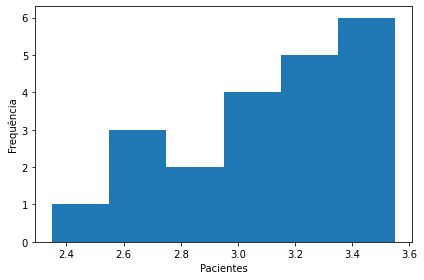

In [17]:
plt.hist(pacientes, bins=quebras)
plt.xlabel('Pacientes')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

## Exercício 5

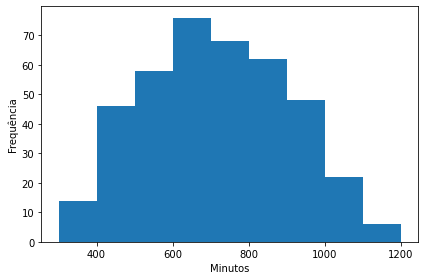

In [18]:
ensino_medio = np.concatenate((np.repeat(300,14),
                               np.repeat(401,46),                 
                               np.repeat(501,58),
                               np.repeat(601,76),
                               np.repeat(701,68),
                               np.repeat(801,62),
                               np.repeat(901,48),
                               np.repeat(1001,22),
                               np.repeat(1101,3),
                               np.repeat(1200,3))
                             )

quebras_ensino_medio = np.linspace(start=np.min(ensino_medio), stop=np.max(ensino_medio), num=10)

plt.hist(ensino_medio, bins=quebras_ensino_medio)
plt.xlabel('Minutos')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

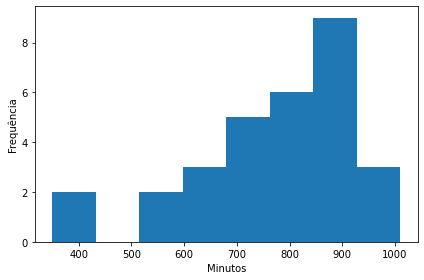

In [19]:
ensino_superior = np.array([350,560,580,710,945,880,760,640,660,820,
                            775,910,920,850,810,790,890,685,730,850,
                            745,640,1010,420,770,850,915,840,930,895])

quebras_ensino_superior = np.linspace(start=np.min(ensino_superior), stop=np.max(ensino_superior), num=9)

plt.hist(ensino_superior, bins=quebras_ensino_superior)
plt.xlabel('Minutos')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

<h4> Analisando os dois histogramas é possível notar que os alunos do ensino médio possui uma enorme quantidade de alunos que assistem entre 600 e 800 minutos, enquanto que no ensino superior isso só ocorre na faixa de 700 a 900 minutos. Por conta da quantidade de amostras no ensino superior, é possível que não esteja representando corretamente a população universitária. O histograma do ensino médio se aproxima de uma curva normal, enquanto o histograma do ensino superior possui uma calda a esquerda.</h4>

## Exercício 6

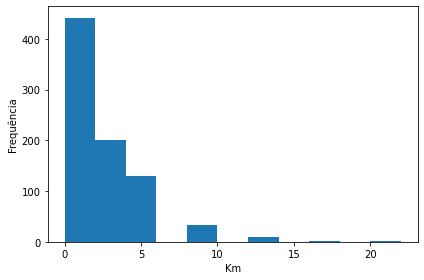

In [20]:
antes_treinamento  = np.concatenate(
                    (np.repeat(0,442),
                     np.repeat(2.1,200),
                     np.repeat(4.1,130),
                     np.repeat(8.1,34),
                     np.repeat(12.1,10),
                     np.repeat(16.1,2),
                     np.repeat(22,1)
                    )
)

quebras_antes_treinamento = np.linspace(start=np.min(antes_treinamento), 
                                        stop=np.max(antes_treinamento), 
                                        num=12)


plt.hist(antes_treinamento, bins=quebras_antes_treinamento)
plt.xlabel('Km')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

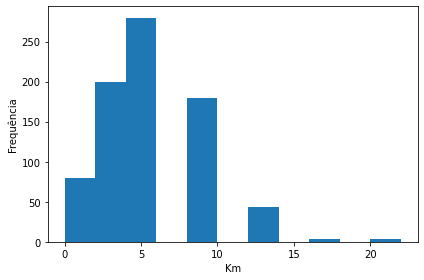

In [21]:
depois_treinamento = np.concatenate(
                    (np.repeat(0,80),
                     np.repeat(2.1,200),
                     np.repeat(4.1,280),
                     np.repeat(8.1,179),
                     np.repeat(12.1,43),
                     np.repeat(16.1,4),
                     np.repeat(22,4)
                    )
)

quebras_depois_treinamento = np.linspace(start=np.min(depois_treinamento), 
                                        stop=np.max(depois_treinamento), 
                                        num=12)


plt.hist(depois_treinamento, bins=quebras_depois_treinamento)
plt.xlabel('Km')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [22]:
print("Média Antes do Treinamento", np.mean(antes_treinamento))
print("Mediana Antes do Treinamento", np.median(antes_treinamento))
print("Quantis Antes do Treinamento")
np.quantile(antes_treinamento, q=[0, 0.25, 0.5, 0.75, 0.95])

Média Antes do Treinamento 1.7137973137973137
Mediana Antes do Treinamento 0.0
Quantis Antes do Treinamento


array([0. , 0. , 0. , 2.1, 8.1])

In [23]:
print("Média Depois do Treinamento", np.mean(depois_treinamento))
print("Mediana Depois do Treinamento", np.median(depois_treinamento))
print("Quantis Depois do Treinamento")
np.quantile(depois_treinamento, q=[0, 0.25, 0.5, 0.75, 0.95])

Média Depois do Treinamento 4.671645569620253
Mediana Depois do Treinamento 4.1
Quantis Depois do Treinamento


array([ 0. ,  2.1,  4.1,  8.1, 12.1])

<h4>
    <p>Analisando os dados acima, podemos concluir que o treinamento surtiu efeito, devido a mudança drástica da média de quilometragem percorrida que saiu de aproximadamente 1.71 Km para aproximadamente 4.7 Km. Além disso, é possível perceber que o desempenho dos alunos aumentou com o treinamento, de maneira que a distribuição da quilometragem observada antes do treinamento difere da quilometragem observada após o treinamento. Ainda se mantiveram 200 indivíduos na faixa de 2 a 4 Km, entretanto houve um aumento significativo nas faixas de 4 a 8 Km e de 8 a 12 Km. Percebemos também um leve aumento na faixa entre 12 e 16 Km e menor ainda na faixa de 16 a 22 Km.</p>
</h4>

## Exercício 7

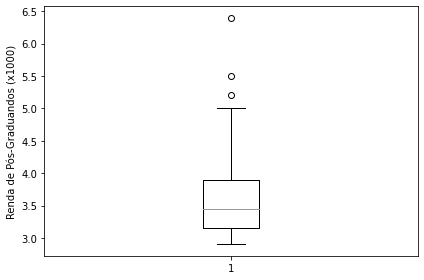

In [24]:
renda_pos_graduando = np.array([
                        2.90, 
                        2.90, 
                        2.95, 
                        2.95,
                        3.10, 
                        3.10, 
                        3.15, 
                        3.20, 
                        3.20, 
                        3.25, 
                        3.30, 
                        3.40, 
                        3.45, 
                        3.45, 
                        3.50, 
                        3.65, 
                        3.65, 
                        3.80,
                        3.90,
                        3.90, 
                        4.00, 
                        5.00, 
                        5.20, 
                        5.50,
                        6.40])

plt.boxplot(renda_pos_graduando)
plt.ylabel('Renda de Pós-Graduandos (x1000)')

plt.tight_layout()
plt.show()

# Exercício 8

In [25]:
industria_secoes = pd.read_csv("./DataSets/industria_secoes.csv", sep=";")
industria_secoes.head()

,Secao,Direito,Politica,Estatistica
0,Pessoal,9,9.0,9
1,Pessoal,9,6.5,9
2,Pessoal,9,9.0,8
3,Pessoal,9,6.0,8
4,Pessoal,9,6.5,9


In [26]:
media_direito    = industria_secoes.Direito.mean()
mediana_direito  = industria_secoes.Direito.median()
sd_direito       = industria_secoes.Direito.std()
cv_direito       = (sd_direito/media_direito)*100

media_politica    = industria_secoes.Politica.mean()
mediana_politica  = industria_secoes.Politica.median()
sd_politica       = industria_secoes.Politica.std()
cv_politica       = (sd_politica/media_politica)*100

media_estatistica    = industria_secoes.Estatistica.mean()
mediana_estatistica  = industria_secoes.Estatistica.median()
sd_estatistica       = industria_secoes.Estatistica.std()
cv_estatistica       = (sd_estatistica/media_estatistica)*100

industria_secoes.Direito = industria_secoes.Direito.astype("float64")
industria_secoes.Politica = industria_secoes.Politica.astype("float64")
industria_secoes.Estatistica = industria_secoes.Estatistica.astype("float64")

In [27]:
l_media = [media_direito, media_politica, media_estatistica]
l_mediana = [mediana_direito, mediana_politica, mediana_estatistica]
l_std = [sd_direito, sd_politica, sd_estatistica]
l_cv = [cv_direito, cv_politica, cv_estatistica]
df_disciplina = pd.DataFrame(
    {'discipline': ['Direito', 'Politica', 'Estatistica'],
     'mean': l_media,
     'median': l_mediana,
     'standard_deviation': l_std,
     'variation_coefficient':l_cv
    })
df_disciplina

,discipline,mean,median,standard_deviation,variation_coefficient
0,Direito,9.00,9.0,0.000000,0.000000
1,Politica,7.30,7.0,1.391941,19.067686
2,Estatistica,7.96,8.0,1.540563,19.353802


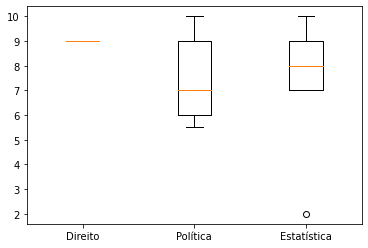

In [28]:
data = [industria_secoes.Direito, industria_secoes.Politica, industria_secoes.Estatistica]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data, labels=['Direito', 'Política', 'Estatística'])

plt.show()

<h4>
    Podemos perceber que há uma grande diferença entre a Politica e os outros cursos, tendo em vista a distribuição entre o 1º e o 3º e o volume de indivíduos acima do 2º quartil. Ainda é possível perceber que apenas na Estatística teve um indivíduo que ficou muito além da turma com uma nota bem inferior aos demais. Enquanto que em Direito todos obtiveram a mesma nota.
</h4>

In [29]:
calculated_industria = industria_secoes.groupby(by=['Secao']).agg({'Estatistica': [np.mean, np.median, np.std, variation]}).reset_index()
calculated_industria[('Estatistica', 'variation')] = calculated_industria[('Estatistica', 'variation')] * 100
calculated_industria

Secao Estatistica                            
                  mean median       std  variation
0  Pessoal    8.714286    9.0  0.755929   8.031114
1  Técnica    8.285714    8.0  1.112697  12.432935
2   Vendas    7.272727    8.0  1.902152  24.937422

<h4>
    Analisando as três seções podemos obervar que o desempenho da seção de Pessoal foi superior aos demais.
</h4>